- 탐색적 데이터 분석(EDA)은 데이터 분석가가 데이터 세트를 분석 및 조사
- 주요 특성을 요약하는 데 사용 
- 이는 데이터 시각화 방법을 사용한다.

### 1. EDA 및 시각화 개괄
1. 데이터 분할 : 2015~2020 train 2021~2022 test
2. 이상치 처리 원저라이징 전 EDA 확인
- 학습데이터(원저라이정)인 train 데이터로 EDA 및 시각화 진행
3.  원저라이징 (후) 데이터 : EDA

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings 
warnings.filterwarnings('ignore')

# 통계 라이브러리리
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

### 2. 데이터 분할

In [2]:
# 윈저라이징 전 데이터 불러오기
df = pd.read_csv("./2. 전처리완료.csv")

In [3]:
# 데이터 확인을 위한 2015~2020년은 train 데이터, 2021~2022년은 test 데이터로 분리
train_df = df[df['결산년도'] <= 2020]
test_df = df[df['결산년도'] >= 2021]

In [4]:
# train, test data의 정상데이터 부실데이터 비율 확인
print("train label 비율",train_df["label"].value_counts()) # train
print("test label 비율", test_df["label"].value_counts()) # test

train label 비율 label
0    6967
1     391
Name: count, dtype: int64
test label 비율 label
0    3107
1     150
Name: count, dtype: int64


In [5]:
# 코드 설명
# 1. train_df["label"] == 0
# train_df DataFrame의 label 열에서 값이 0인 행을 필터링합니다. 조건에 맞는 행만 선택합니다.
# 예를 들어, label 열이 회사의 상태(정상/비정상)를 나타낸다고 가정합니다.
# 2. train_df[train_df["label"] == 0]
# 위 조건을 만족하는 행들만 포함하는 새로운 DataFrame을 생성합니다.
# 이 DataFrame에는 label 값이 0인 행만 남습니다.
# 3. ["회사명"]
# 필터링된 DataFrame에서 회사명 열만 선택합니다. 결과는 Series 형태입니다.
# 4. .unique()
# 선택한 회사명 열에서 고유한 값들을 반환합니다. --> 중복된 회사명은 제거됩니다.
# 반환 값은 고유 값의 Numpy 배열입니다.
# 5. len(...)
# unique()로 반환된 고유 회사명의 배열에서 요소의 개수를 계산합니다.-->즉, label이 0인 정상 기업의 고유 회사명 수를 세는 역할을 합니다.
# 6. print()
# 결과를 "정상기업 수 : "라는 텍스트와 함께 출력합니다.

In [6]:
# train 기업수 데이터 확인
# 정상기업 부실기업수 확인
print("정상기업 수 :", len(train_df[train_df["label"] == 0]["회사명"].unique()))
print("부실기업 수 :", len(train_df[train_df["label"] == 1]["회사명"].unique()))

정상기업 수 : 1478
부실기업 수 : 391


### 3. EDA

### 3-1 라벨링 갯수 확인 시각화

결산년도별 라벨링 개수:
label     0    1
결산년도            
2015    935   72
2016   1012   54
2017   1137   49
2018   1206   58
2019   1293   56
2020   1384  102


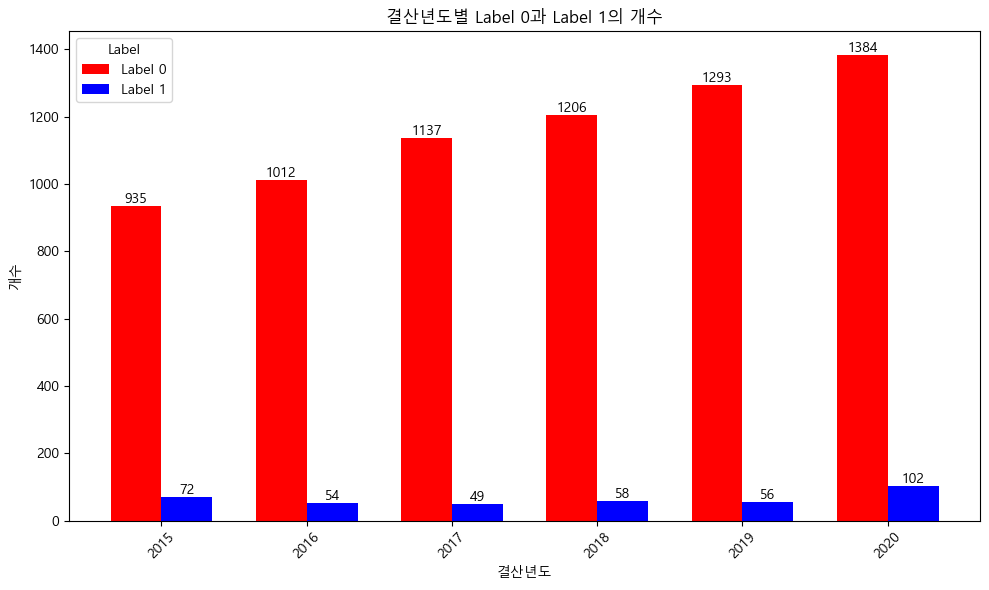

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 결산년도별 라벨링 개수 계산
label_count_by_year = train_df.groupby(['결산년도', 'label']).size().unstack(fill_value=0)

# 데이터 출력
print("결산년도별 라벨링 개수:")
print(label_count_by_year)

# 그래프 생성
x = label_count_by_year.index  # 결산년도
width = 0.35  # 막대 폭 설정

fig, ax = plt.subplots(figsize=(10, 6))

# 각 라벨의 막대 추가
bar1 = ax.bar(x - width / 2, label_count_by_year[0], width, label='Label 0', color='red')
bar2 = ax.bar(x + width / 2, label_count_by_year[1], width, label='Label 1', color='blue')

# 그래프 제목 및 축 레이블 설정
ax.set_title('결산년도별 Label 0과 Label 1의 개수')
ax.set_xlabel('결산년도')
ax.set_ylabel('개수')
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45)
ax.legend(title='Label')

# 데이터 라벨 추가 (막대 위에 개수 표시)
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10)

for bar in bar2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10)

# 레이아웃 정리 및 출력
plt.tight_layout()
plt.show()


### 3-2 기초통계량 (원저라이징 전) 
: train data==>  부실데이터 정상데이터 

#### 1) 정상기업 데이터

In [8]:

train_df[train_df["label"] == 0].describe()

,결산월,결산년도,유동비율,당좌비율,부채비율,자기자본비율,차입금의존도,현금비율,순운전자본비율,자기자본이익률,총자산이익률,자산성장률,자기자본성장률,매출총이익성장률,총자산회전율,재고자산회전율,순운전자본회전율,총부채상환능력비율,label
count,6967.0,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6.967000e+03,6.967000e+03,6967.000000,6967.0
mean,12.0,2017.726568,308.607614,253.969730,37.252042,62.747969,82.776736,69.646249,19.210386,-0.114224,0.110122,11.075374,19.568425,99.359374,10.300746,6.657777e+03,1.881343e+02,19.542068,0.0
std,0.0,1.690532,463.619800,433.854154,20.220002,20.220007,269.324519,145.017961,25.541720,12.180924,3.162468,47.528730,431.759075,7353.231611,13.548183,2.973647e+05,2.291695e+04,58.321187,0.0
min,12.0,2015.000000,3.650000,1.870000,0.690000,-193.140000,-16075.120000,0.000000,-258.630000,-246.540000,-28.080000,-81.650000,-6848.150000,-236766.840000,0.000000,0.000000e+00,-1.064490e+06,-828.520000,0.0
25%,12.0,2016.000000,104.615000,74.050000,20.740000,48.950000,26.040000,8.720000,1.515000,-0.425000,-0.265000,-2.135000,-0.820000,-17.450000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
50%,12.0,2018.000000,171.530000,131.830000,36.750000,63.250000,57.860000,26.320000,18.570000,0.500000,0.300000,4.010000,4.650000,1.730000,0.000000,0.000000e+00,0.000000e+00,11.390000,0.0
75%,12.0,2019.000000,327.830000,261.220000,51.050000,79.260000,103.925000,71.500000,36.830000,1.970000,1.250000,13.490000,13.850000,21.565000,18.660000,2.214800e+02,1.461000e+02,31.225000,0.0
max,12.0,2020.000000,10436.810000,10178.480000,293.140000,99.310000,4908.250000,3192.850000,95.930000,739.390000,72.860000,2498.140000,34294.770000,467466.920000,108.260000,2.055717e+07,1.513817e+06,778.080000,0.0


#### 2) 부실기업 데이터

In [9]:

train_df[train_df["label"] == 1].describe()

,결산월,결산년도,유동비율,당좌비율,부채비율,자기자본비율,차입금의존도,현금비율,순운전자본비율,자기자본이익률,총자산이익률,자산성장률,자기자본성장률,매출총이익성장률,총자산회전율,재고자산회전율,순운전자본회전율,총부채상환능력비율,label
count,391.0,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,3.910000e+02,391.000000,391.000000,391.0
mean,12.0,2017.710997,270.901228,236.101049,44.906061,55.093939,325.865396,75.719437,12.000281,-19.967391,-3.244476,14.710818,23.639361,28.743657,7.017059,1.025667e+04,-87.443095,-0.913427,1.0
std,0.0,1.856619,467.303331,448.604539,30.299505,30.299505,2987.019341,222.899317,34.520887,220.023167,7.191566,66.850493,397.668747,374.726466,10.285781,1.898038e+05,3746.384802,59.032769,0.0
min,12.0,2015.000000,12.100000,10.610000,2.170000,-264.800000,-1240.580000,0.000000,-319.960000,-4321.180000,-44.330000,-84.220000,-4982.360000,-1946.400000,0.000000,0.000000e+00,-67210.940000,-373.710000,1.0
25%,12.0,2016.000000,88.205000,67.880000,25.865000,41.680000,30.700000,5.595000,-4.525000,-11.220000,-5.425000,-11.060000,-9.900000,-41.640000,0.000000,0.000000e+00,-0.000000,-13.380000,1.0
50%,12.0,2018.000000,149.240000,119.260000,42.710000,57.290000,68.080000,22.980000,13.830000,-0.950000,-0.650000,3.240000,4.240000,-4.150000,0.000000,0.000000e+00,0.000000,1.290000,1.0
75%,12.0,2020.000000,259.840000,220.660000,58.320000,74.135000,130.910000,65.435000,32.455000,0.970000,0.540000,17.370000,25.350000,25.545000,12.880000,2.090000e+02,59.125000,16.355000,1.0
max,12.0,2020.000000,5071.650000,5069.250000,364.800000,97.830000,52886.960000,2547.650000,95.890000,223.540000,21.310000,628.080000,4199.030000,3903.910000,59.070000,3.752037e+06,13937.960000,505.950000,1.0


### 3-3 각 컬럼별 정상기업과 부실기업 데이터 분포확인(시각화)

In [10]:
# 피처후보
columns = train_df.columns[4:19]
columns

Index(['유동비율', '당좌비율', '부채비율', '자기자본비율', '차입금의존도', '현금비율', '순운전자본비율',
       '자기자본이익률', '총자산이익률', '자산성장률', '자기자본성장률', '매출총이익성장률', '총자산회전율',
       '재고자산회전율', '순운전자본회전율'],
      dtype='object')

#### 바이올린 플롯(Violin Plot)
- 데이터 분포를 시각화하는 그래프
- 박스 플롯(Box Plot)과 커널 밀도 추정(Kernel Density Estimation, KDE)을 결합한 형태 
- 데이터의 분포와 변동성을 더 자세히 보여주는 데 유용
- [구성 요소]
- 밀도 곡선 (Density Plot) : 데이터 분포를 커널 밀도 추정을 통해 시각적으로 표현한 곡선
- 데이터의 값이 얼마나 빈번하게 나타나는지 밀도로 나타냅니다.
- 곡선의 폭이 넓을수록 해당 값 주변에 데이터가 많음을 의미합니다.
- 중앙선 (Median Line) : 데이터의 중앙값을 표시합니다.
- 박스 플롯 영역 : 바이올린 플롯 중앙에 박스 플롯 형태로 나타나는 경우가 많습니다.
- 1사분위수(Q1), 중앙값(Median), 3사분위수(Q3)를 포함합니다.
- 데이터의 IQR(사분위 범위)을 표시합니다.
- 수염 (Whiskers) : 데이터의 최소값과 최대값을 나타냅니다.
- 이상치(outliers)는 수염을 초과하여 표시됩니다.

In [11]:
# # 코드 설명
# # fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
# plt.subplots: n_rows와 n_cols로 구성된 서브플롯을 생성합니다.
# figsize=(15, 5 * n_rows): 전체 그림의 크기를 설정합니다.  너비는 15, 높이는 행 수에 비례하여 
# fig: 전체 그림을 나타내는 Figure 객체.
# axes: 서브플롯들의 Axes 객체 배열. 2D 배열 형태(n_rows x n_cols)로 반환됩니다.
# #axes = axes.flatten()
# 2D 배열 형태로 반환된 Axes 객체 배열을 1D 배열로 변환합니다.
# 이는 플롯을 작성할 때 반복문으로 쉽게 접근할 수 있도록 합니다.

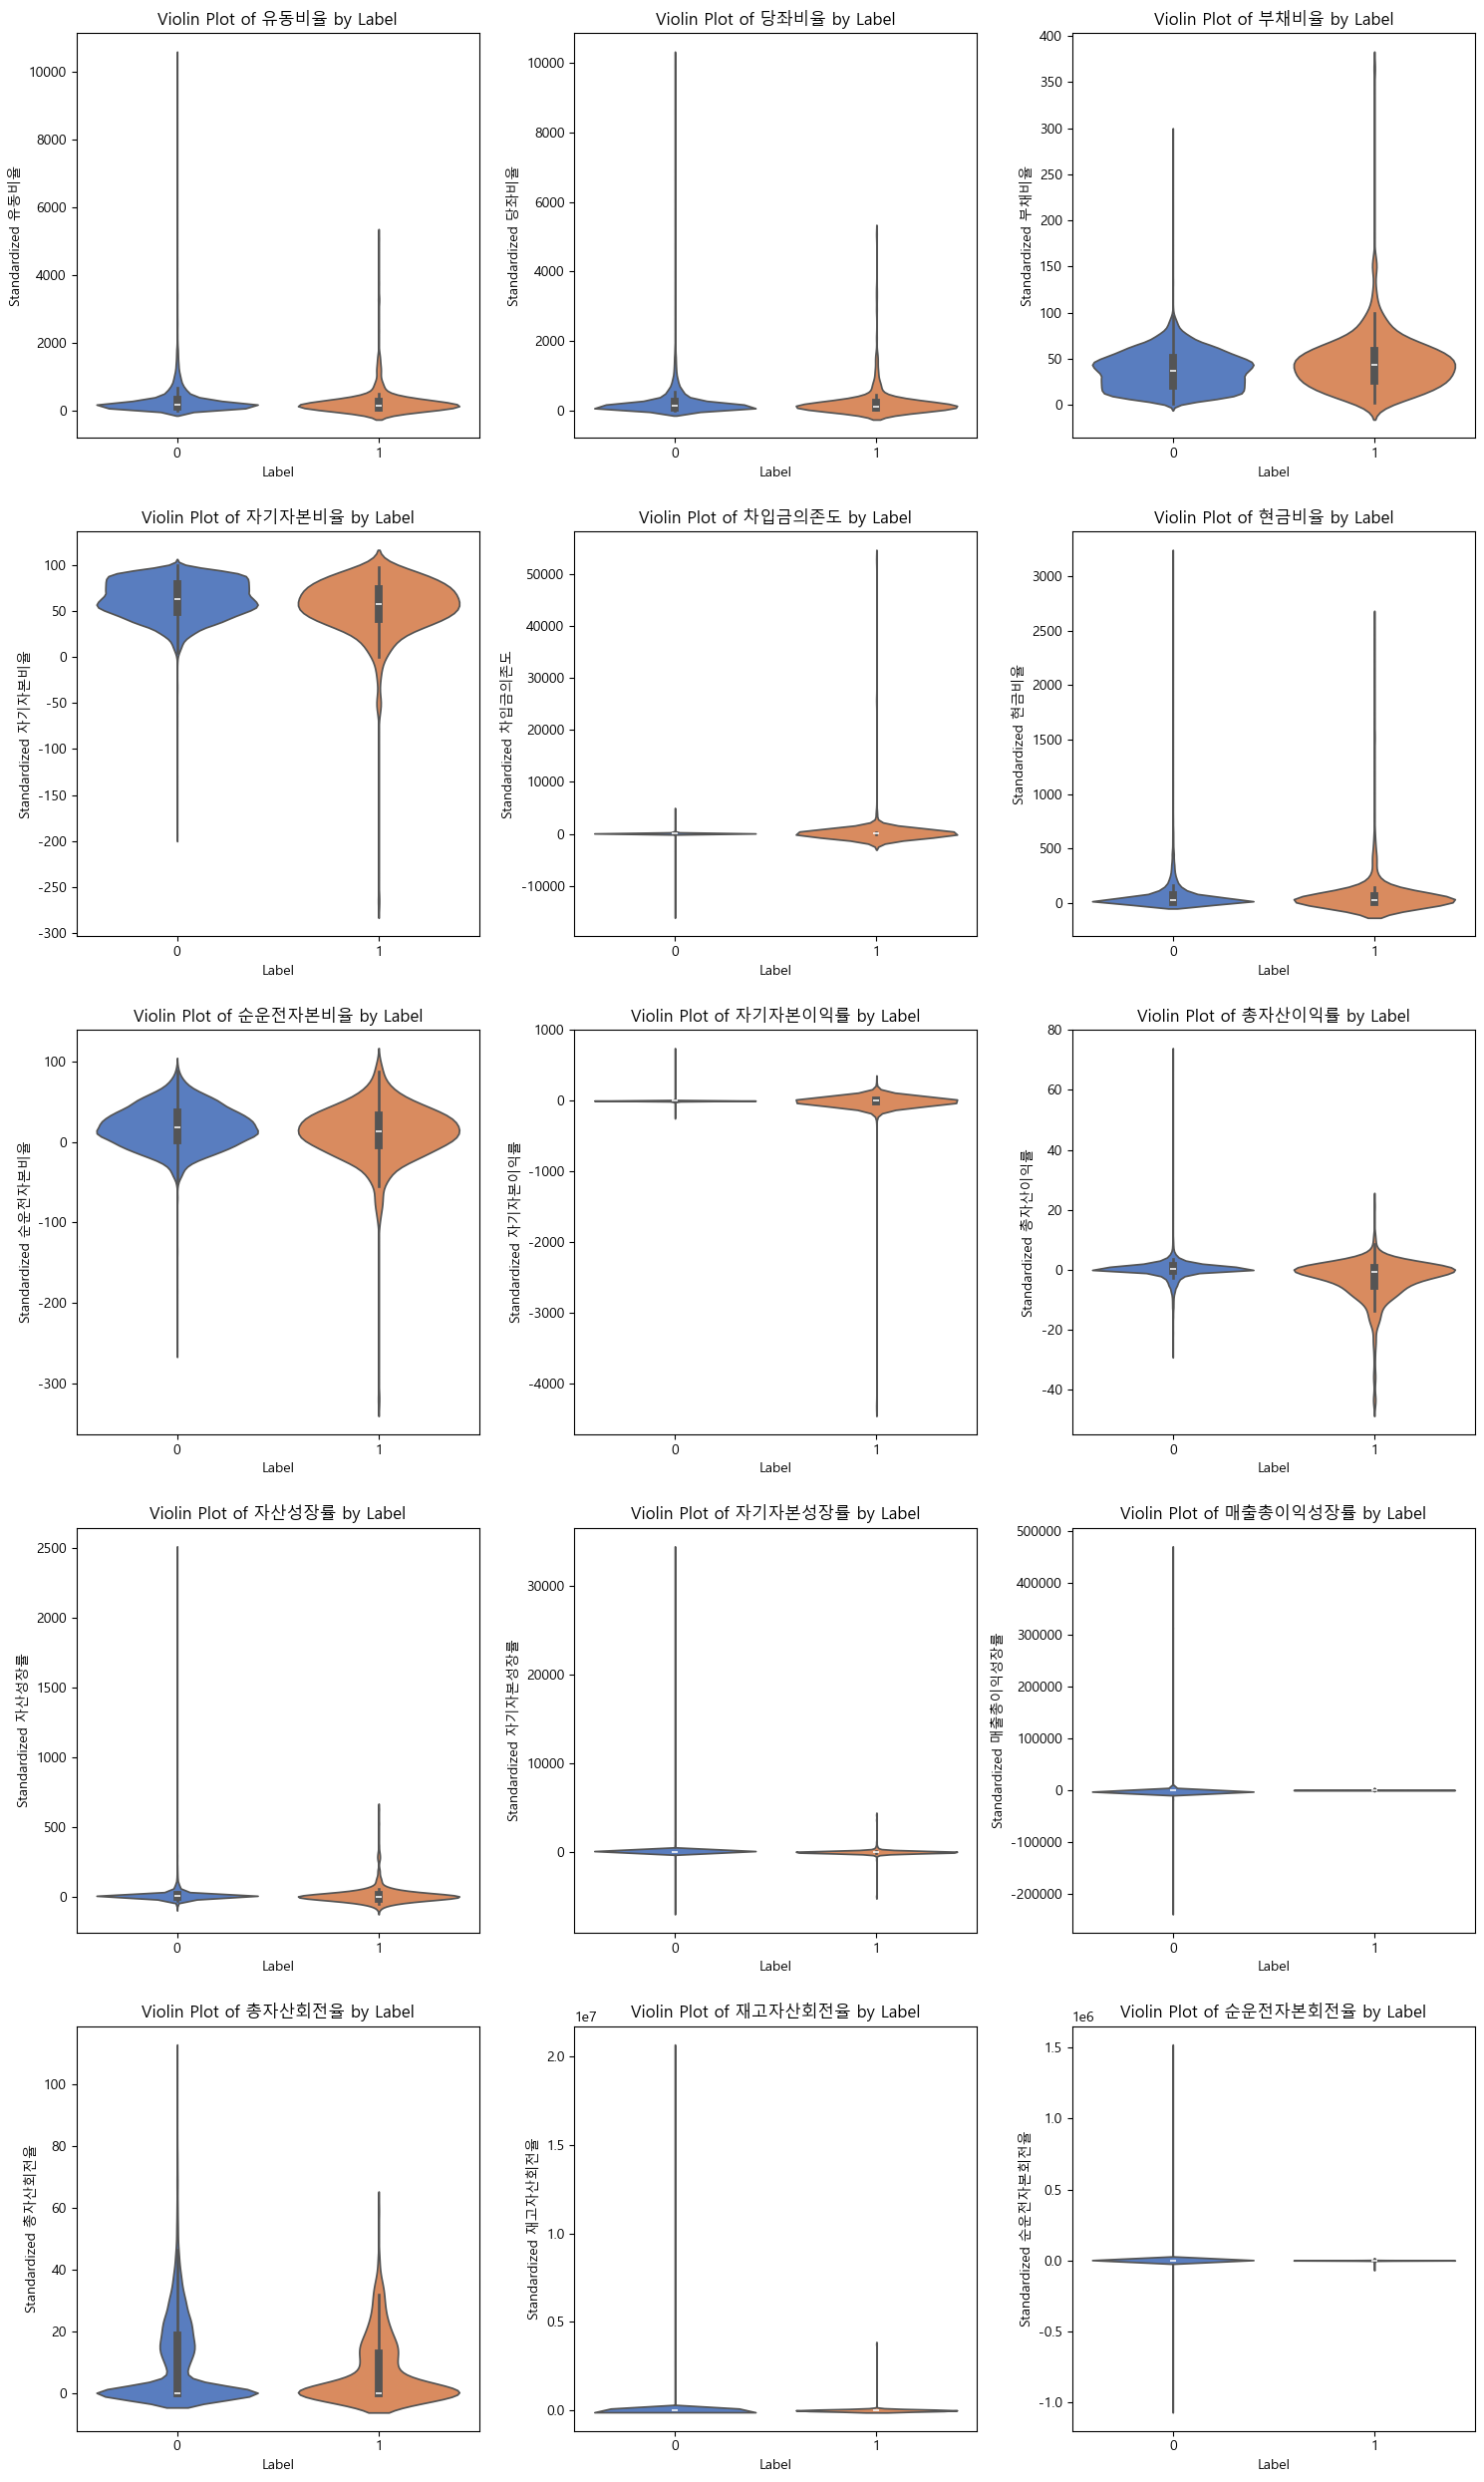

In [12]:
# 서브플롯 설정
n_cols = 3  # 서브플롯 열 수
n_rows = -(-len(columns) // n_cols)  # 행 수 계산
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# 컬럼별 바이올린 플롯 생성
for i, col in enumerate(columns):
    sns.violinplot(
        x='label', y=col, data=train_df, palette='muted', inner='box', ax=axes[i]
    )
    axes[i].set_title(f'Violin Plot of {col} by Label') # 그래프제목 (컬명명으로)
    axes[i].set_xlabel('Label') # Label표시
    axes[i].set_ylabel(f'Standardized {col}') # 컬럼 값표시

# 빈 서브플롯 숨기기
for i in range(len(columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### 3-4 컬럼별 상관계수 확인
- 하삼각 히트맵(lower triangle heatmap) : . 보통 대칭적인 상관계수 행렬(Correlation Matrix)에서 하삼각 부분만 남긴 형태

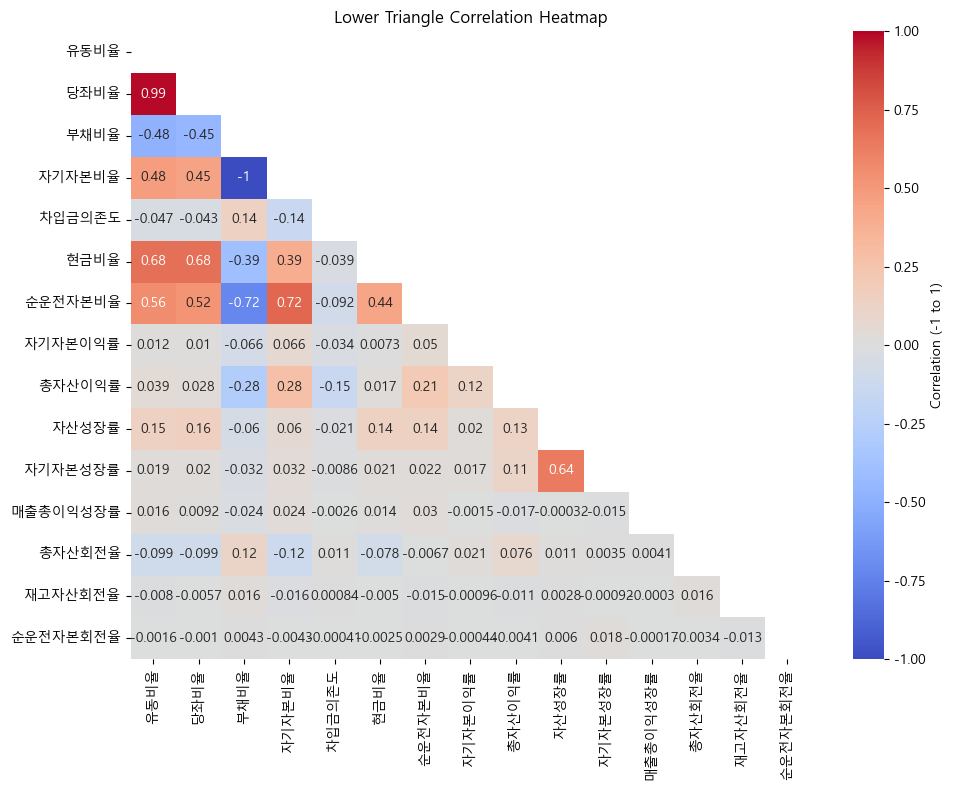

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
correlation = train_df[columns].corr()

# 하삼각 행렬만 선택 (대각선 제외)
mask_lower = np.tril(np.ones_like(correlation, dtype=bool), k=-1)  # k=-1로 대각선 제외
correlation_lower = correlation.where(mask_lower)

# 플롯 크기 설정
plt.figure(figsize=(10, 8)) # 히트맵이 그려질 그림의 크기를 설정 , figsize=(10, 8)은 너비 10, 높이 8인 그림을 생성

# 하삼각 히트맵 (대각선 제외, annot=True로 값 출력)
# correlation_lower: 히트맵으로 시각화할 데이터 보통 대칭적인 상관계수 행렬(Correlation Matrix)에서 하삼각 부분만 남긴 형태
# annot=True:각 셀에 상관계수 값을 출력합니다.
# cmap='coolwarm':히트맵의 색상 맵을 설정합니다.coolwarm은 파란색(음수 상관)에서 빨간색(양수 상관)으로 변환하는 색상 맵입니다.
# cbar=True:히트맵 오른쪽에 컬러 바(color bar)를 표시합니다.
# cbar_kws={'label': 'Correlation (-1 to 1)'}:컬러 바의 레이블을 설정합니다.
# vmin=-1, vmax=1:색상 범위를 -1에서 1로 고정합니다.
# 상관계수는 항상 -1과 1 사이에 있으므로 이 범위를 설정합니다


sns.heatmap(correlation_lower, annot=True, cmap='coolwarm', cbar=True, 
            cbar_kws={'label': 'Correlation (-1 to 1)'}, 
            vmin=-1, vmax=1)  # 색상 범위 설정 (-1에서 1 사이)

plt.title('Lower Triangle Correlation Heatmap')
plt.tight_layout()
plt.show()


### 3-5 윈저라이징 후 데이터 EDA
각 컬럼별 정상기업과 부실기업 데이터 분포확인

In [14]:
## 데이터 불러오기 (윈저화된 train 데이터)
train_df = pd.read_csv('./2. train_df.csv')

#### 1) 정상 데이터 기초통계량

In [15]:
train_df[train_df["label"] == 0].describe()

,결산월,결산년도,유동비율,당좌비율,부채비율,자기자본비율,차입금의존도,현금비율,순운전자본비율,자기자본이익률,총자산이익률,자산성장률,자기자본성장률,매출총이익성장률,총자산회전율,재고자산회전율,순운전자본회전율,총부채상환능력비율,label
count,6967.0,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.000000,6967.0
mean,12.0,2017.726568,294.246432,239.548875,37.140122,62.859889,82.640669,65.344438,19.280934,-0.242486,0.086538,9.723545,13.640477,13.535545,10.172686,492.956427,58.873809,19.607078,0.0
std,0.0,1.690532,340.651796,305.163109,19.596173,19.596179,91.186632,106.525606,24.834569,5.408744,2.608686,26.336054,44.459631,108.980631,13.030840,1984.947429,635.812347,43.465794,0.0
min,12.0,2015.000000,28.600000,18.970000,4.140000,11.460000,3.900000,0.140000,-40.110000,-34.340000,-12.950000,-40.670000,-72.950000,-322.190000,0.000000,0.000000,-3223.040000,-117.510000,0.0
25%,12.0,2016.000000,104.615000,74.050000,20.740000,48.950000,26.040000,8.720000,1.515000,-0.425000,-0.265000,-2.135000,-0.820000,-17.450000,0.000000,0.000000,0.000000,0.000000,0.0
50%,12.0,2018.000000,171.530000,131.830000,36.750000,63.250000,57.860000,26.320000,18.570000,0.500000,0.300000,4.010000,4.650000,1.730000,0.000000,0.000000,0.000000,11.390000,0.0
75%,12.0,2019.000000,327.830000,261.220000,51.050000,79.260000,103.925000,71.500000,36.830000,1.970000,1.250000,13.490000,13.850000,21.565000,18.660000,221.480000,146.100000,31.225000,0.0
max,12.0,2020.000000,2029.620000,1850.460000,88.540000,95.860000,629.870000,645.410000,76.660000,10.730000,6.400000,156.200000,309.280000,760.970000,53.800000,16096.660000,3258.470000,202.650000,0.0


#### 2) 부실 데이터 기초통계량

In [16]:
train_df[train_df["label"] == 1].describe()

,결산월,결산년도,유동비율,당좌비율,부채비율,자기자본비율,차입금의존도,현금비율,순운전자본비율,자기자본이익률,총자산이익률,자산성장률,자기자본성장률,매출총이익성장률,총자산회전율,재고자산회전율,순운전자본회전율,총부채상환능력비율,label
count,391.0,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.00000,391.000000,391.000000,391.000000,391.000000,391.0
mean,12.0,2017.710997,251.815396,217.008926,43.053913,56.946087,110.155550,61.053734,13.529309,-6.370921,-2.612813,10.420153,17.968261,15.73087,7.003581,386.789847,34.019182,0.884450,1.0
std,0.0,1.856619,331.649544,311.736456,22.407056,22.407056,134.277168,113.051906,27.430832,11.515422,4.707177,40.221758,72.723405,163.99612,10.220644,1633.158214,570.022747,42.185372,0.0
min,12.0,2015.000000,28.600000,18.970000,4.140000,11.460000,3.900000,0.140000,-40.110000,-34.340000,-12.950000,-40.670000,-72.950000,-322.19000,0.000000,0.000000,-3223.040000,-117.510000,1.0
25%,12.0,2016.000000,88.205000,67.880000,25.865000,41.680000,30.700000,5.595000,-4.525000,-11.220000,-5.425000,-11.060000,-9.900000,-41.64000,0.000000,0.000000,0.000000,-13.380000,1.0
50%,12.0,2018.000000,149.240000,119.260000,42.710000,57.290000,68.080000,22.980000,13.830000,-0.950000,-0.650000,3.240000,4.240000,-4.15000,0.000000,0.000000,0.000000,1.290000,1.0
75%,12.0,2020.000000,259.840000,220.660000,58.320000,74.135000,130.910000,65.435000,32.455000,0.970000,0.540000,17.370000,25.350000,25.54500,12.880000,209.000000,59.125000,16.355000,1.0
max,12.0,2020.000000,2029.620000,1850.460000,88.540000,95.860000,629.870000,645.410000,76.660000,10.730000,6.400000,156.200000,309.280000,760.97000,53.800000,16096.660000,3258.470000,202.650000,1.0


#### 3) 피처후보

In [17]:

columns = train_df.columns[4:19]
columns

Index(['유동비율', '당좌비율', '부채비율', '자기자본비율', '차입금의존도', '현금비율', '순운전자본비율',
       '자기자본이익률', '총자산이익률', '자산성장률', '자기자본성장률', '매출총이익성장률', '총자산회전율',
       '재고자산회전율', '순운전자본회전율'],
      dtype='object')

#### 4) 서브플롯 설정

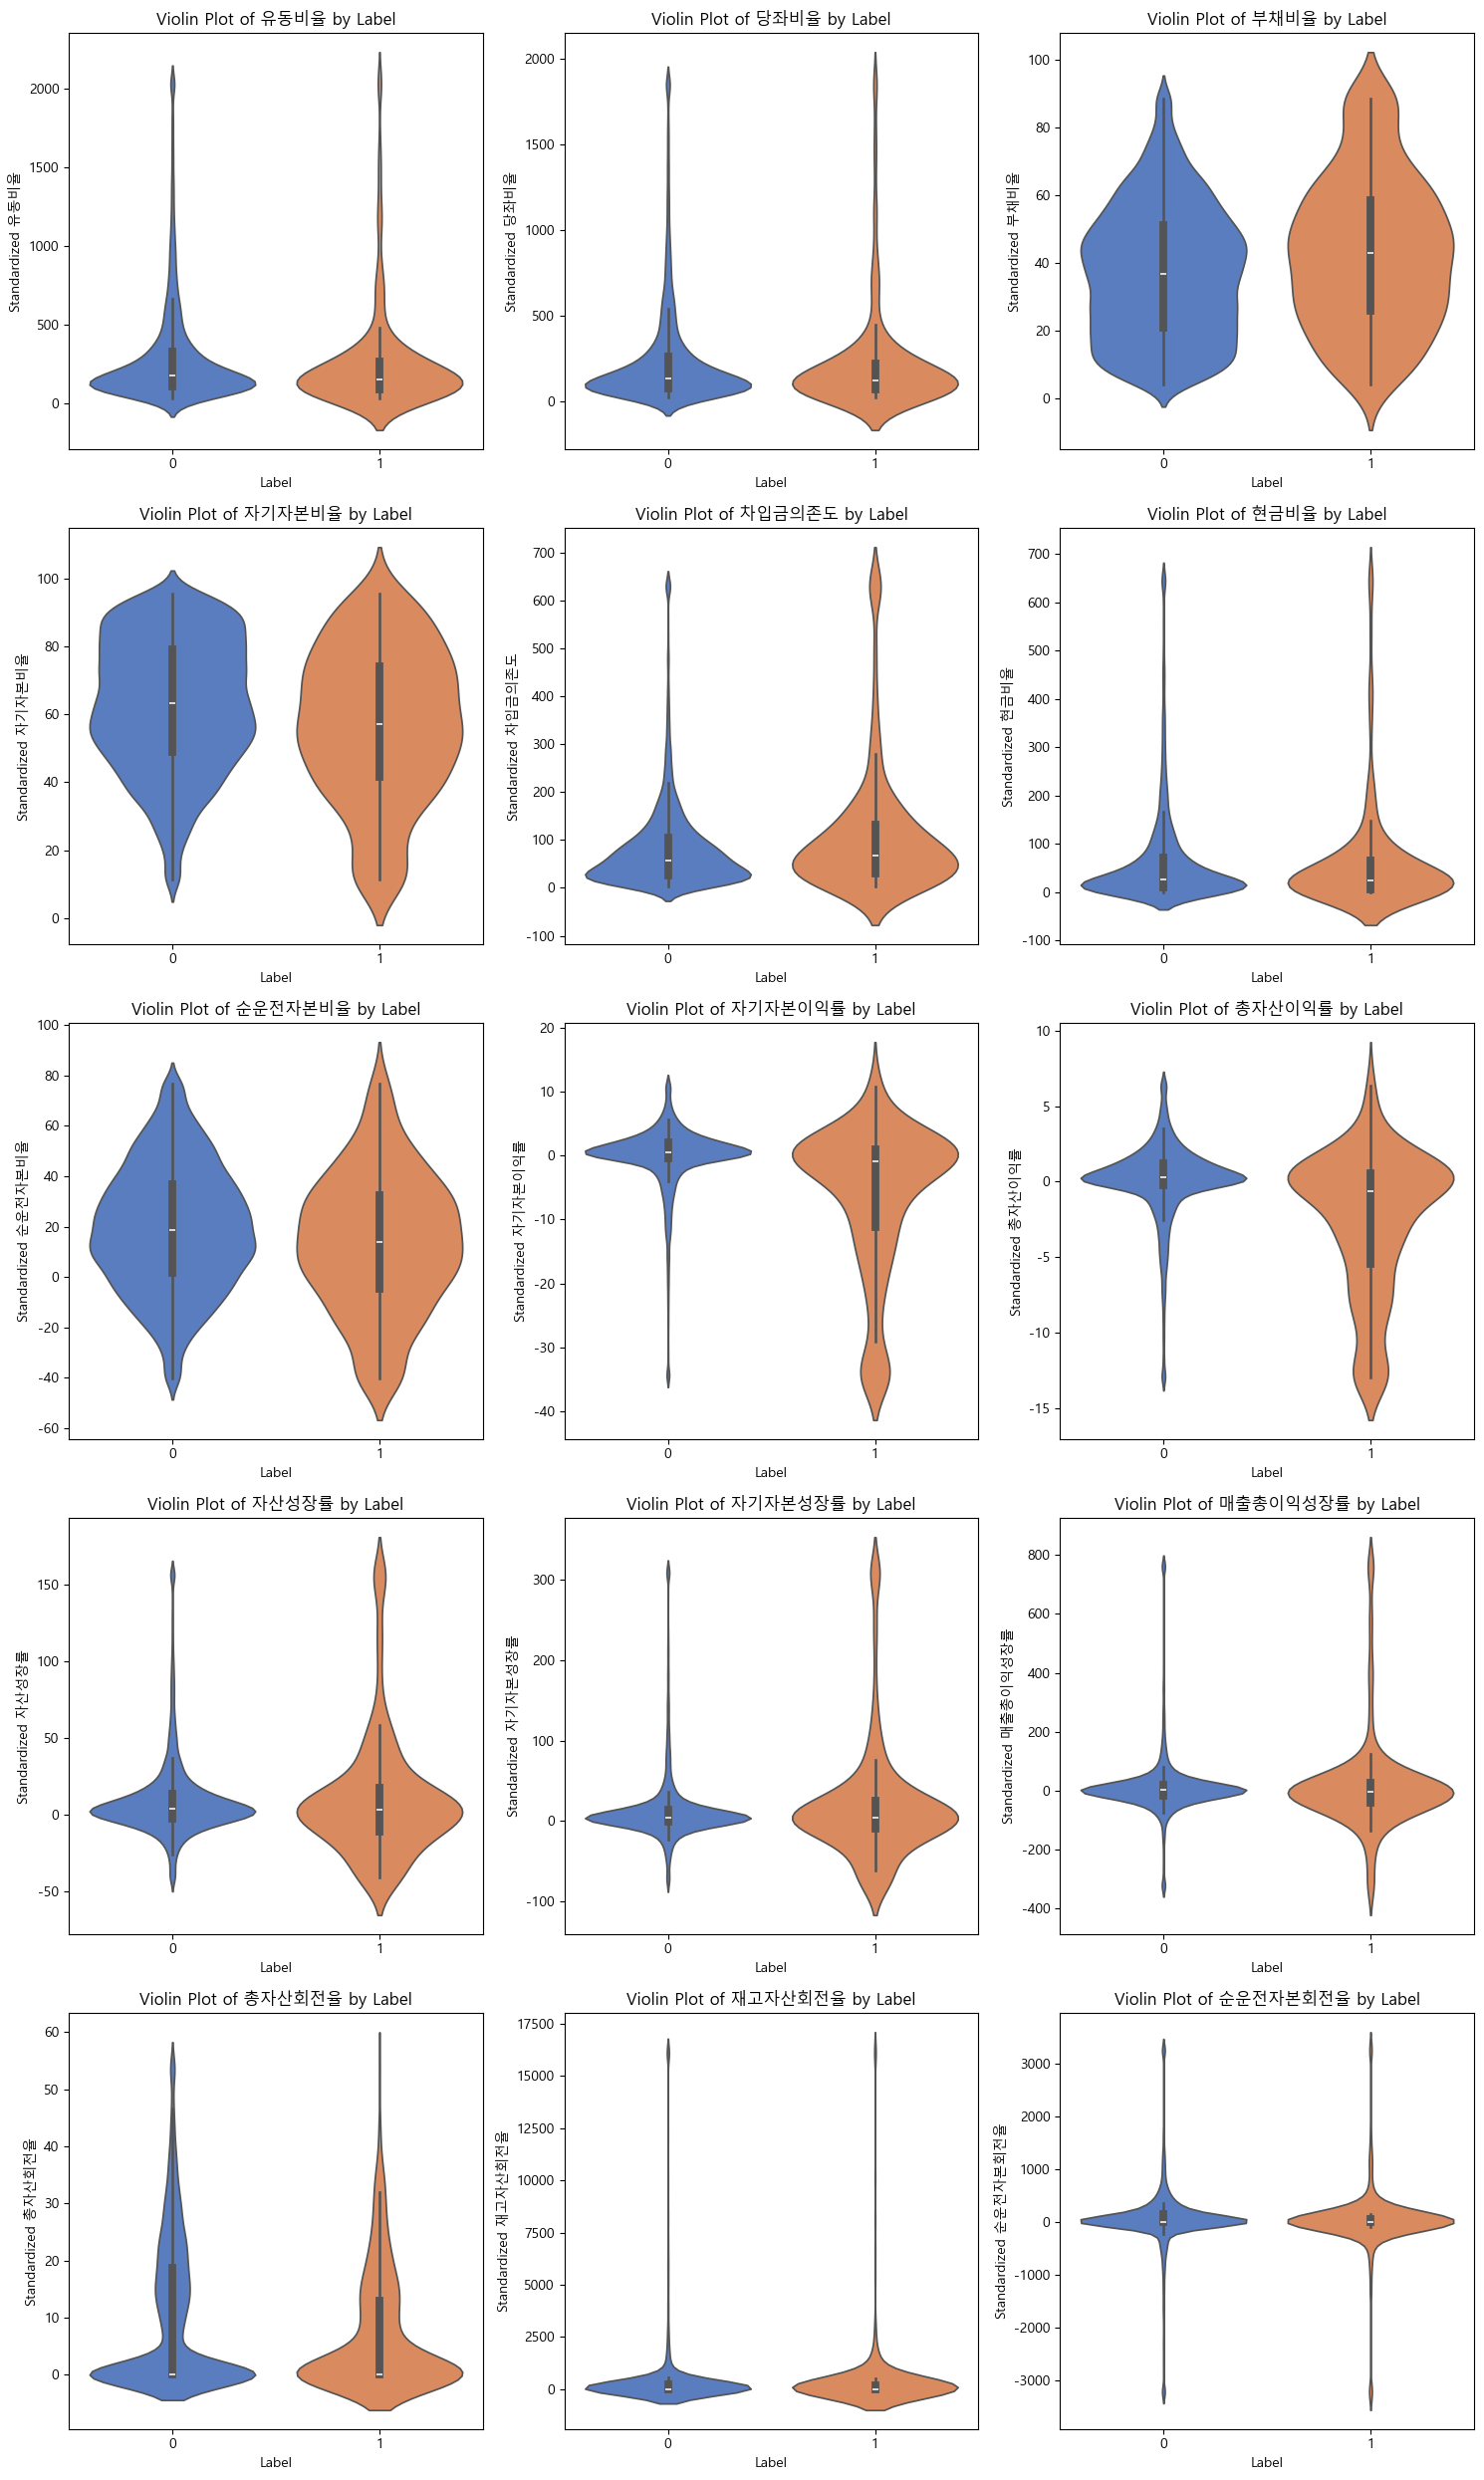

In [18]:

n_cols = 3  # 서브플롯 열 수
n_rows = -(-len(columns) // n_cols)  # 행 수 계산
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# 컬럼별 바이올린 플롯 생성하여 시각화
# '반복문'으로 컬럼별로 바이올린 플롯 생성: for i, col in enumerate(columns)
# columns는 바이올린 플롯을 생성할 데이터 열 이름의 리스트입니다.
# enumerate()를 사용하여 컬럼 이름(col)과 인덱스(i)를 동시에 가져옵니다.

# x='label':label 열을 x축에 사용합니다.이 열은 범주형 데이터로, 바이올린 플롯이 그룹화될 기준입니다.
# y=col:col은 현재 반복문에서 선택된 열(특징 데이터)로, y축에 표시됩니다.데이터의 분포를 시각화합니다.
# data=train_df:데이터가 저장된 Pandas DataFrame을 지정합니다.
# palette='muted':플롯의 색상을 설정합니다. muted는 부드러운 색상 팔레트를 제공합니다.
# inner='box':바이올린 내부에 **상자그림(Box Plot)**을 추가합니다.상자그림은 중위수, 사분위수를 보여줍니다.
# ax=axes[i]:플롯이 그려질 서브플롯을 지정합니다.axes는 Matplotlib 서브플롯 배열이고, axes[i]는 현재 반복 중인 서브플롯입니다.

for i, col in enumerate(columns):
    sns.violinplot(
        x='label', y=col, data=train_df, palette='muted', inner='box', ax=axes[i]
    )
    axes[i].set_title(f'Violin Plot of {col} by Label') # 그래프 제목 설정하기
    axes[i].set_xlabel('Label') # Label표시
    axes[i].set_ylabel(f'Standardized {col}') # 컬럼 값표시

# 1.빈 서브플롯 탐색
# len(columns): 실제로 데이터 플롯에 사용되는 열(column)의 개수입니다.
# len(axes): 전체 서브플롯의 Axes 객체 수입니다.
# range(len(columns), len(axes)): 플롯에 데이터가 할당되지 않은 서브플롯 인덱스만 반복합니다.

# 2. 서브플롯 숨기기
# axes[i].axis('off') : axis('off')를 호출하면 서브플롯의 축, 눈금, 배경 등 모든 시각적 요소를 비활성화합니다.
# 빈 서브플롯이 화면에 나타나지 않도록 설정합니다.

for i in range(len(columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### 5) 컬럼별 상관계수(correlation coefficient) 확인

- 상관계수는 두 변수 사이의 통계적 관계를 표현하기 위해 특정한 상관 관계의 정도를 수치적으로 나타낸 계수
- 피어슨 상관계수 : -1 ~ 1 범위

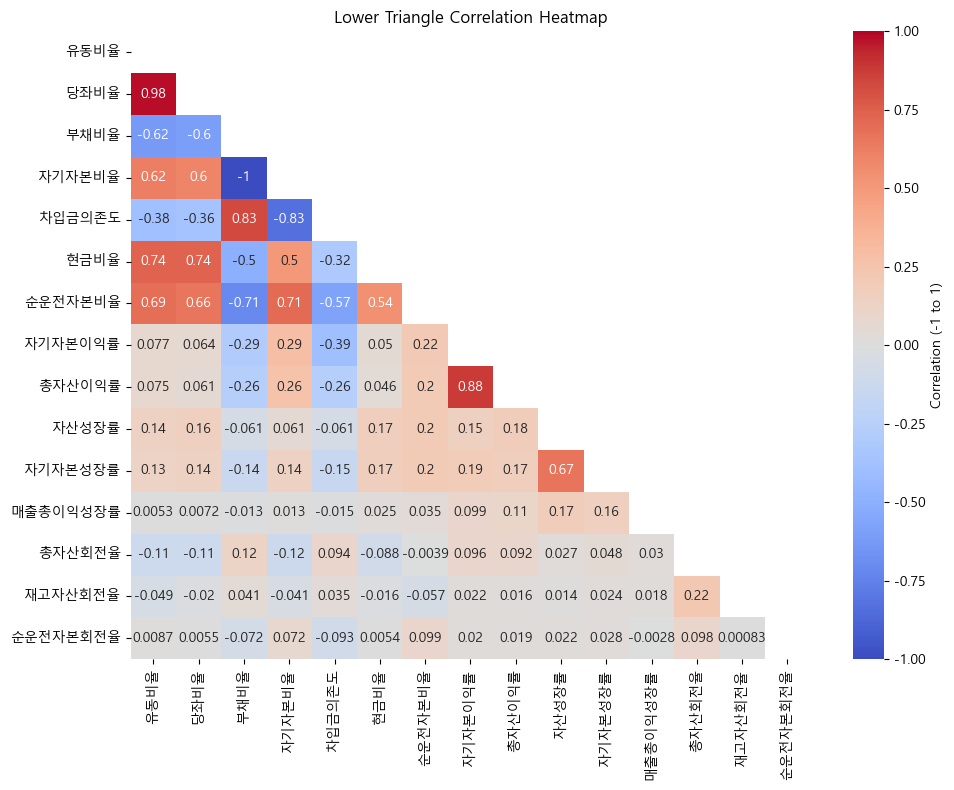

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
correlation = train_df[columns].corr()

# 하삼각 행렬만 선택 (대각선 제외)
mask_lower = np.tril(np.ones_like(correlation, dtype=bool), k=-1)  # k=-1로 대각선 제외
correlation_lower = correlation.where(mask_lower)

# 플롯 크기 설정
plt.figure(figsize=(10, 8))

# 하삼각 히트맵 (대각선 제외, annot=True로 값 출력)
sns.heatmap(correlation_lower, annot=True, cmap='coolwarm', cbar=True, 
            cbar_kws={'label': 'Correlation (-1 to 1)'}, 
            vmin=-1, vmax=1)  # 색상 범위 설정 (-1에서 1 사이)

plt.title('Lower Triangle Correlation Heatmap')
plt.tight_layout()
plt.show()